In [1]:
import pandas as pd
import numpy as np

# SUE calculations
- SUE stands for standardised unexpected earnings model
- Standardized unex-pected earnings (SUE) model was firstly presented by Rendleman, Hones and Latane (1982), and the model was used to measure PEAD by Bernard and Thomas (1989), who pointed out that the drifting magnitude is more obvious in small-cap firms than the large one
- This notebook constructs SUE model with quarterly report data of the microcap market 

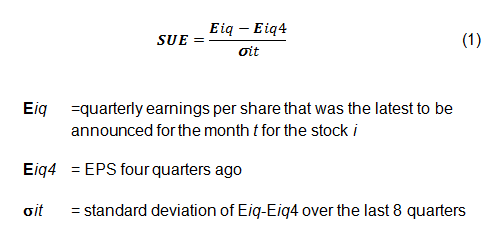

In [2]:
from IPython.core.display import Image, display
display(Image('../pictures/sue formula.png', width=1000, unconfined=True))

In [3]:
df_pred =pd.read_csv("../dataset/df_pred.csv")
df_std =pd.read_csv("../dataset/df_std.csv")
actual_eps = pd.read_csv("../dataset/actual_eps.csv")

### Data Preprocessing

In [4]:
# we have to drop some columns
# also have to drop some ticker names such as 'ZSAN'
# we also have to transpose it so the dates are correct , or maybe we have to transpose the other 2 back for the backtesting. idk yet
actual_eps = actual_eps.drop(columns = ['Unnamed: 0'])

In [5]:
names = ['TCON','TMBR', 'TAT', 'BSTC','ZSAN','RCKT','TAT','LLEXQ','WSTL','NTRP','JCAP','RKDA','RMNI','PATI','ZEUS']

actual_eps = actual_eps[~actual_eps['Ticker'].isin(names)]


In [6]:
actual_eps = actual_eps.reset_index().drop(columns = ['index'])

In [7]:
actual_eps

,Ticker,2020-09-30,2020-06-30,2020-03-31,2019-12-31,2019-09-30,2019-06-30,2019-03-31,2018-12-31,2018-09-30,...,2017-06-30,2017-03-31,2016-12-31,2016-09-30,2016-06-30,2016-03-31,2015-12-31,2015-09-30,2015-06-30,2015-03-31
0,ZNOG,-0.01,-0.01,-0.01,-0.01,-0.02,-0.02,-0.03,-0.52,0.02,...,-0.100,-0.070,-0.040,-0.040,-0.080,-0.040,-0.02,-0.05,-0.060,-0.070
1,ZIVO,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,-0.02,-0.01,-0.03,...,-0.010,-0.010,-0.010,-0.010,-0.020,-0.010,0.00,-0.01,-0.020,-0.010
2,ZGNX,-1.08,-0.96,-0.54,-1.20,-6.75,-0.89,-0.83,-0.49,-1.08,...,-0.930,-0.860,-0.940,-0.690,-0.760,-0.420,-0.50,-0.65,3.780,-1.200
3,ZAGG,0.21,-0.11,-2.54,0.86,0.30,-0.18,-0.50,0.52,0.52,...,0.120,-0.220,-0.150,-0.250,-0.040,-0.120,0.18,0.13,0.130,0.110
4,YEWB,0.02,0.01,0.00,-0.04,0.02,0.03,0.01,-0.06,-0.01,...,0.200,0.000,-0.030,0.020,0.030,0.020,0.03,0.02,0.040,0.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,ABMC,-0.01,0.00,-0.01,-0.01,0.00,0.00,-0.01,-0.01,-0.01,...,-0.010,0.000,0.000,-0.010,0.000,0.000,-0.01,0.00,-0.010,0.000
825,ABIO,-0.33,-0.73,-0.83,-0.69,-0.76,-1.14,-1.86,-1.80,-1.98,...,-10.619,-8.639,-8.279,-9.179,-7.739,-7.199,-5.04,-5.58,-12.599,-16.378
826,ABEO,-0.08,-0.14,-0.52,-0.29,-0.35,-0.49,-0.39,-0.42,-0.34,...,-0.210,-0.130,-0.190,-0.080,-0.200,-0.170,-0.06,-0.19,-0.160,-0.100
827,ABCP,-0.04,-0.02,-0.03,-0.02,-0.03,-0.05,-0.02,0.02,-0.02,...,-0.030,-0.030,-0.010,-0.020,-0.020,-0.030,-0.02,-0.04,-0.030,-0.030


In [8]:
Ticker = actual_eps['Ticker']

In [9]:
actual_eps.drop(columns=['Ticker'],inplace = True)

In [10]:
eps_pred= df_pred
std_dev = df_std

In [11]:
std_dev.columns
#dtypes is still object here for the columns

Index(['2017-06-30', '2017-09-30', '2017-12-31', '2018-03-31', '2018-06-30',
       '2018-09-30', '2018-12-31', '2019-03-31', '2019-06-30', '2019-09-30',
       '2019-12-31', '2020-03-31', '2020-06-30', '2020-09-30'],
      dtype='object')

In [12]:
eps_pred

,2017-06-30,2017-09-30,2017-12-31,2018-03-31,2018-06-30,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30
0,-0.077526,-0.067402,-0.043300,-0.063360,-0.041844,-0.016240,-0.228547,-0.181236,-0.139855,-0.111711,-0.063799,-0.009167,0.014574,0.054376
1,-0.009441,-0.016131,-0.024188,-0.027500,-0.026963,-0.033112,-0.026404,-0.024175,-0.016660,-0.009145,-0.004666,-0.004092,-0.000758,-0.001346
2,-2.349622,-0.957112,-1.539675,-1.382778,-1.159700,-1.148596,-0.779442,-0.676091,-0.597451,-3.500921,-3.530584,-2.683446,-2.118258,-1.646326
3,-0.177664,0.031655,0.196344,0.342069,0.354044,0.530813,0.617139,0.180600,-0.098296,-0.035156,0.305436,-0.862258,-0.792583,-0.605077
4,0.074847,0.063920,-0.021246,-0.022851,-0.011848,-0.016244,-0.042611,-0.046967,-0.035833,0.027467,0.024358,-0.007372,-0.001111,0.017658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,-0.003611,-0.003333,-0.005278,-0.009454,-0.006111,-0.007222,-0.010566,-0.010833,-0.005833,-0.003886,-0.004167,-0.006667,-0.004721,-0.005000
825,-11.780677,-15.299937,-9.346222,-4.046234,1.608923,6.302910,9.756475,9.917597,10.376277,8.548939,4.412158,2.038920,0.712056,0.456622
826,-0.170594,-0.161431,-0.191766,-0.175408,-0.216417,-0.301556,-0.368907,-0.434864,-0.504349,-0.510239,-0.445342,-0.494694,-0.337178,-0.176306
827,-0.020526,-0.720332,-0.373222,-0.253526,-0.174119,-0.087029,0.017816,0.104083,0.173224,0.252027,-0.202732,-0.041226,-0.028836,-0.039262


In [13]:
actual_eps

,2020-09-30,2020-06-30,2020-03-31,2019-12-31,2019-09-30,2019-06-30,2019-03-31,2018-12-31,2018-09-30,2018-06-30,...,2017-06-30,2017-03-31,2016-12-31,2016-09-30,2016-06-30,2016-03-31,2015-12-31,2015-09-30,2015-06-30,2015-03-31
0,-0.01,-0.01,-0.01,-0.01,-0.02,-0.02,-0.03,-0.52,0.02,-0.02,...,-0.100,-0.070,-0.040,-0.040,-0.080,-0.040,-0.02,-0.05,-0.060,-0.070
1,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,-0.02,-0.01,-0.03,-0.02,...,-0.010,-0.010,-0.010,-0.010,-0.020,-0.010,0.00,-0.01,-0.020,-0.010
2,-1.08,-0.96,-0.54,-1.20,-6.75,-0.89,-0.83,-0.49,-1.08,-0.83,...,-0.930,-0.860,-0.940,-0.690,-0.760,-0.420,-0.50,-0.65,3.780,-1.200
3,0.21,-0.11,-2.54,0.86,0.30,-0.18,-0.50,0.52,0.52,0.11,...,0.120,-0.220,-0.150,-0.250,-0.040,-0.120,0.18,0.13,0.130,0.110
4,0.02,0.01,0.00,-0.04,0.02,0.03,0.01,-0.06,-0.01,0.03,...,0.200,0.000,-0.030,0.020,0.030,0.020,0.03,0.02,0.040,0.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,-0.01,0.00,-0.01,-0.01,0.00,0.00,-0.01,-0.01,-0.01,0.00,...,-0.010,0.000,0.000,-0.010,0.000,0.000,-0.01,0.00,-0.010,0.000
825,-0.33,-0.73,-0.83,-0.69,-0.76,-1.14,-1.86,-1.80,-1.98,-2.70,...,-10.619,-8.639,-8.279,-9.179,-7.739,-7.199,-5.04,-5.58,-12.599,-16.378
826,-0.08,-0.14,-0.52,-0.29,-0.35,-0.49,-0.39,-0.42,-0.34,-0.25,...,-0.210,-0.130,-0.190,-0.080,-0.200,-0.170,-0.06,-0.19,-0.160,-0.100
827,-0.04,-0.02,-0.03,-0.02,-0.03,-0.05,-0.02,0.02,-0.02,-0.03,...,-0.030,-0.030,-0.010,-0.020,-0.020,-0.030,-0.02,-0.04,-0.030,-0.030


In [14]:
#  for testing
# a = actual_eps.iloc[::,:-9]
# a

In [15]:
actual_eps = actual_eps.iloc[::,:-9]


In [16]:
actual_eps

,2020-09-30,2020-06-30,2020-03-31,2019-12-31,2019-09-30,2019-06-30,2019-03-31,2018-12-31,2018-09-30,2018-06-30,2018-03-31,2017-12-31,2017-09-30,2017-06-30
0,-0.01,-0.01,-0.01,-0.01,-0.02,-0.02,-0.03,-0.52,0.02,-0.02,-0.11,0.00,-0.030,-0.100
1,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,-0.02,-0.01,-0.03,-0.02,-0.03,-0.03,-0.020,-0.010
2,-1.08,-0.96,-0.54,-1.20,-6.75,-0.89,-0.83,-0.49,-1.08,-0.83,-0.87,-1.17,-1.680,-0.930
3,0.21,-0.11,-2.54,0.86,0.30,-0.18,-0.50,0.52,0.52,0.11,0.25,0.29,0.350,0.120
4,0.02,0.01,0.00,-0.04,0.02,0.03,0.01,-0.06,-0.01,0.03,0.00,-0.15,0.010,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,-0.01,0.00,-0.01,-0.01,0.00,0.00,-0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.000,-0.010
825,-0.33,-0.73,-0.83,-0.69,-0.76,-1.14,-1.86,-1.80,-1.98,-2.70,-3.60,-6.12,-7.019,-10.619
826,-0.08,-0.14,-0.52,-0.29,-0.35,-0.49,-0.39,-0.42,-0.34,-0.25,-0.18,-0.19,-0.130,-0.210
827,-0.04,-0.02,-0.03,-0.02,-0.03,-0.05,-0.02,0.02,-0.02,-0.03,0.04,0.47,-1.590,-0.030


In [17]:
std_dev

,2017-06-30,2017-09-30,2017-12-31,2018-03-31,2018-06-30,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30
0,0.024552,0.025874,0.031225,0.035707,0.037454,0.043301,0.164545,0.165008,0.166808,0.168333,0.169222,0.168671,0.169738,0.170131
1,0.006009,0.006009,0.008660,0.008660,0.008333,0.009280,0.009280,0.008660,0.008660,0.008660,0.009280,0.008660,0.008660,0.008333
2,1.510293,0.367291,0.376995,0.349110,0.298077,0.288839,0.321947,0.325862,0.324735,1.950484,1.955229,1.982339,1.979001,1.970032
3,0.167564,0.204817,0.223594,0.231036,0.225580,0.270139,0.262509,0.336229,0.330799,0.333208,0.401293,1.008129,1.000812,1.004151
4,0.064614,0.065192,0.089598,0.089505,0.089691,0.089691,0.092256,0.091652,0.092060,0.058095,0.057975,0.030732,0.031002,0.029907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,0.005270,0.005000,0.005270,0.005270,0.005270,0.005270,0.005270,0.005000,0.005000,0.005270,0.005000,0.005000,0.005270,0.005000
825,2.353103,1.739657,1.665146,1.995502,2.584798,3.073327,3.237036,3.289517,3.179455,2.196415,1.706510,0.980931,0.720395,0.604630
826,0.053645,0.054186,0.054186,0.042459,0.051235,0.075737,0.096566,0.109253,0.125044,0.122690,0.104496,0.110050,0.118650,0.147403
827,0.008819,0.521739,0.566895,0.568861,0.568861,0.568861,0.570032,0.569776,0.569366,0.569366,0.163554,0.027889,0.018559,0.019365


### Flip dates from right to left (for std and eps_pred)

In [18]:
std_dev.head(1)

,2017-06-30,2017-09-30,2017-12-31,2018-03-31,2018-06-30,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30
0,0.024552,0.025874,0.031225,0.035707,0.037454,0.043301,0.164545,0.165008,0.166808,0.168333,0.169222,0.168671,0.169738,0.170131


In [19]:
std_dev

,2017-06-30,2017-09-30,2017-12-31,2018-03-31,2018-06-30,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30
0,0.024552,0.025874,0.031225,0.035707,0.037454,0.043301,0.164545,0.165008,0.166808,0.168333,0.169222,0.168671,0.169738,0.170131
1,0.006009,0.006009,0.008660,0.008660,0.008333,0.009280,0.009280,0.008660,0.008660,0.008660,0.009280,0.008660,0.008660,0.008333
2,1.510293,0.367291,0.376995,0.349110,0.298077,0.288839,0.321947,0.325862,0.324735,1.950484,1.955229,1.982339,1.979001,1.970032
3,0.167564,0.204817,0.223594,0.231036,0.225580,0.270139,0.262509,0.336229,0.330799,0.333208,0.401293,1.008129,1.000812,1.004151
4,0.064614,0.065192,0.089598,0.089505,0.089691,0.089691,0.092256,0.091652,0.092060,0.058095,0.057975,0.030732,0.031002,0.029907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,0.005270,0.005000,0.005270,0.005270,0.005270,0.005270,0.005270,0.005000,0.005000,0.005270,0.005000,0.005000,0.005270,0.005000
825,2.353103,1.739657,1.665146,1.995502,2.584798,3.073327,3.237036,3.289517,3.179455,2.196415,1.706510,0.980931,0.720395,0.604630
826,0.053645,0.054186,0.054186,0.042459,0.051235,0.075737,0.096566,0.109253,0.125044,0.122690,0.104496,0.110050,0.118650,0.147403
827,0.008819,0.521739,0.566895,0.568861,0.568861,0.568861,0.570032,0.569776,0.569366,0.569366,0.163554,0.027889,0.018559,0.019365


In [20]:
#reverse the order of std_dev
data = std_dev
columns = data.columns.tolist()
columns = columns[::-1]
data = data[columns]
std_dev = data

In [21]:
#rever the order of eps_pred
data = eps_pred
columns = data.columns.tolist()
columns = columns[::-1]
data = data[columns]
eps_pred = data

In [22]:
actual_eps

,2020-09-30,2020-06-30,2020-03-31,2019-12-31,2019-09-30,2019-06-30,2019-03-31,2018-12-31,2018-09-30,2018-06-30,2018-03-31,2017-12-31,2017-09-30,2017-06-30
0,-0.01,-0.01,-0.01,-0.01,-0.02,-0.02,-0.03,-0.52,0.02,-0.02,-0.11,0.00,-0.030,-0.100
1,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,-0.02,-0.01,-0.03,-0.02,-0.03,-0.03,-0.020,-0.010
2,-1.08,-0.96,-0.54,-1.20,-6.75,-0.89,-0.83,-0.49,-1.08,-0.83,-0.87,-1.17,-1.680,-0.930
3,0.21,-0.11,-2.54,0.86,0.30,-0.18,-0.50,0.52,0.52,0.11,0.25,0.29,0.350,0.120
4,0.02,0.01,0.00,-0.04,0.02,0.03,0.01,-0.06,-0.01,0.03,0.00,-0.15,0.010,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,-0.01,0.00,-0.01,-0.01,0.00,0.00,-0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.000,-0.010
825,-0.33,-0.73,-0.83,-0.69,-0.76,-1.14,-1.86,-1.80,-1.98,-2.70,-3.60,-6.12,-7.019,-10.619
826,-0.08,-0.14,-0.52,-0.29,-0.35,-0.49,-0.39,-0.42,-0.34,-0.25,-0.18,-0.19,-0.130,-0.210
827,-0.04,-0.02,-0.03,-0.02,-0.03,-0.05,-0.02,0.02,-0.02,-0.03,0.04,0.47,-1.590,-0.030


In [23]:
actual_eps.isna().sum().sum()

0

In [24]:
actual_eps = actual_eps.reset_index().drop(columns = ['index'])

In [25]:
#find out how many 0 there are
std_dev.isin([0]).any().sum()

14

In [26]:
# we have to bfill since our time horizon goes from right to left, and also for rows, not columns, so we put axis = 1
std_dev.fillna(method='bfill', inplace = True, axis= 1)

In [27]:
# replace 0 with nan and then forwardfill it
std_dev.replace(0, np.nan, inplace = True)

In [28]:
unexpected_earning = actual_eps-eps_pred


In [29]:
# find SUE
sue = unexpected_earning.truediv(std_dev)
sue

,2020-09-30,2020-06-30,2020-03-31,2019-12-31,2019-09-30,2019-06-30,2019-03-31,2018-12-31,2018-09-30,2018-06-30,2018-03-31,2017-12-31,2017-09-30,2017-06-30
0,-0.378389,-0.144778,-0.004941,0.317919,0.544818,0.718520,0.916532,-1.771270,0.836927,0.583239,-1.306181,1.386710,1.445573,-0.915399
1,-1.038533,0.087565,-0.682236,-0.574857,-0.098727,0.769031,0.482087,1.767735,0.335383,0.835533,-0.288675,-0.671073,-0.643822,-0.093005
2,0.287470,0.585274,1.081271,1.191975,-1.665781,-0.900885,-0.472313,0.899035,0.237487,1.106089,1.468814,0.980584,-1.968160,0.939965
3,0.811708,0.682029,-1.664213,1.381942,1.005844,-0.246991,-2.024215,-0.370040,-0.040029,-1.081856,-0.398504,0.418864,1.554290,1.776420
4,0.078316,0.358402,0.239889,-1.110094,-0.128526,0.715115,0.621557,-0.188486,0.069616,0.466578,0.255300,-1.437026,-0.827095,1.936931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,-1.000000,0.895662,-0.666667,-1.166667,0.737232,1.166667,0.166667,0.107307,-0.527046,1.159502,-0.103512,-0.895979,0.666667,-1.212206
825,-1.300997,-2.001756,-2.924692,-2.989819,-4.238242,-3.622091,-3.580342,-3.570080,-2.695095,-1.667025,0.223620,1.937501,4.760099,0.493679
826,0.653347,1.661847,-0.229950,1.486583,1.306054,0.114750,0.410644,-0.529103,-0.507604,-0.655480,-0.108156,0.032594,0.580061,-0.734563
827,-0.038127,0.476074,0.402513,1.117254,-0.495335,-0.392057,-0.217775,0.003832,0.117830,0.253346,0.515988,1.487441,-1.666865,-1.074301


In [30]:
# reshape the sue dataframe a little
sue['Ticker']=Ticker

In [31]:
Ticker

0      ZNOG
1      ZIVO
2      ZGNX
3      ZAGG
4      YEWB
       ... 
824    ABMC
825    ABIO
826    ABEO
827    ABCP
828    AAME
Name: Ticker, Length: 829, dtype: object

In [32]:
len(Ticker)

829

In [33]:
sue.set_index('Ticker',inplace=True)

In [34]:
#export sue
sue.to_csv('../dataset/sue.csv')

In [35]:
sue

,2020-09-30,2020-06-30,2020-03-31,2019-12-31,2019-09-30,2019-06-30,2019-03-31,2018-12-31,2018-09-30,2018-06-30,2018-03-31,2017-12-31,2017-09-30,2017-06-30
Ticker,,,,,,,,,,,,,,
ZNOG,-0.378389,-0.144778,-0.004941,0.317919,0.544818,0.718520,0.916532,-1.771270,0.836927,0.583239,-1.306181,1.386710,1.445573,-0.915399
ZIVO,-1.038533,0.087565,-0.682236,-0.574857,-0.098727,0.769031,0.482087,1.767735,0.335383,0.835533,-0.288675,-0.671073,-0.643822,-0.093005
ZGNX,0.287470,0.585274,1.081271,1.191975,-1.665781,-0.900885,-0.472313,0.899035,0.237487,1.106089,1.468814,0.980584,-1.968160,0.939965
ZAGG,0.811708,0.682029,-1.664213,1.381942,1.005844,-0.246991,-2.024215,-0.370040,-0.040029,-1.081856,-0.398504,0.418864,1.554290,1.776420
YEWB,0.078316,0.358402,0.239889,-1.110094,-0.128526,0.715115,0.621557,-0.188486,0.069616,0.466578,0.255300,-1.437026,-0.827095,1.936931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ABMC,-1.000000,0.895662,-0.666667,-1.166667,0.737232,1.166667,0.166667,0.107307,-0.527046,1.159502,-0.103512,-0.895979,0.666667,-1.212206
ABIO,-1.300997,-2.001756,-2.924692,-2.989819,-4.238242,-3.622091,-3.580342,-3.570080,-2.695095,-1.667025,0.223620,1.937501,4.760099,0.493679
ABEO,0.653347,1.661847,-0.229950,1.486583,1.306054,0.114750,0.410644,-0.529103,-0.507604,-0.655480,-0.108156,0.032594,0.580061,-0.734563


In [36]:
sue.columns

Index(['2020-09-30', '2020-06-30', '2020-03-31', '2019-12-31', '2019-09-30',
       '2019-06-30', '2019-03-31', '2018-12-31', '2018-09-30', '2018-06-30',
       '2018-03-31', '2017-12-31', '2017-09-30', '2017-06-30'],
      dtype='object')

In [37]:
type(sue['2020-09-30'][2])

numpy.float64

In [38]:
type(sue['2018-03-31'])

pandas.core.series.Series

In [39]:
#fill null in sue with 0
sue.fillna(0,inplace=True)

In [40]:
sue.isna().sum().sum()

0

In [48]:
#create a list called cutoffs and export it
cutoffs = {}
for date in sue.columns.tolist()[0:14]:
    print(date)
    cutoff_list = []
    cutoff_list.append(np.percentile((sue[date]),10))    
    cutoff_list.append(np.percentile(sue[date],15))
    cutoff_list.append(np.percentile(sue[date],20))
    cutoff_list.append(np.percentile(sue[date],25))
    cutoff_list.append(np.percentile(sue[date],30))
    cutoff_list.append(np.percentile(sue[date],40))
    cutoff_list.append(np.percentile(sue[date],50))
    cutoff_list.append(np.percentile(sue[date],60))
    cutoff_list.append(np.percentile(sue[date],70))
    cutoff_list.append(np.percentile(sue[date],75))
    cutoff_list.append(np.percentile(sue[date],80))
    cutoff_list.append(np.percentile(sue[date],85))
    cutoff_list.append(np.percentile(sue[date],90))
    cutoffs[date] = cutoff_list
column_list = [10,15,20,25,30,40,50,60,70,75,80,85,90]
cutoff = pd.DataFrame.from_dict(cutoffs, orient='index',columns=column_list)
#cutoff



2020-09-30
2020-06-30
2020-03-31
2019-12-31
2019-09-30
2019-06-30
2019-03-31
2018-12-31
2018-09-30
2018-06-30
2018-03-31
2017-12-31
2017-09-30
2017-06-30


In [49]:
cutoff

,10,15,20,25,30,40,50,60,70,75,80,85,90
2020-09-30,-1.050526,-0.790363,-0.593919,-0.418167,-0.255659,0.021388,0.234579,0.493639,0.729288,0.844249,0.984037,1.103257,1.253413
2020-06-30,-1.340478,-1.032865,-0.796231,-0.624191,-0.456102,-0.201830,0.026121,0.273505,0.536590,0.712037,0.903405,1.057309,1.254312
2020-03-31,-1.687992,-1.530156,-1.317197,-1.177030,-0.995477,-0.673934,-0.410459,-0.154540,0.113086,0.250162,0.410787,0.626028,0.865461
2019-12-31,-1.385456,-1.117439,-0.912733,-0.777937,-0.666314,-0.442820,-0.221473,-0.019972,0.276115,0.389108,0.554600,0.673910,0.919029
2019-09-30,-1.114879,-0.863696,-0.686471,-0.578092,-0.510715,-0.312939,-0.160197,0.013662,0.266295,0.410304,0.520202,0.666667,0.857987
2019-06-30,-1.156324,-0.910319,-0.753722,-0.609667,-0.492419,-0.323733,-0.151136,0.049008,0.259993,0.404298,0.587048,0.757616,0.900849
2019-03-31,-1.341942,-1.083083,-0.913234,-0.779679,-0.656378,-0.415822,-0.225242,-0.002442,0.207372,0.362976,0.516584,0.705942,0.917752
2018-12-31,-1.477557,-1.203776,-1.011575,-0.838085,-0.707820,-0.456940,-0.224830,0.000621,0.293371,0.420982,0.592447,0.742168,0.962857
2018-09-30,-1.211399,-0.967199,-0.751826,-0.567422,-0.422816,-0.203515,0.028679,0.264889,0.471038,0.581833,0.682073,0.875516,1.057628
2018-06-30,-1.137123,-0.909926,-0.739639,-0.623188,-0.471179,-0.166067,0.116740,0.381698,0.638864,0.717271,0.830119,0.961164,1.142880


In [50]:
cutoff.to_csv('../dataset/sue_cutoffs.csv')